In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,roc_curve,roc_auc_score

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


/Users/ashok/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df= pd.read_csv('df_after_scale.csv')

In [3]:
df.head()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
0,0,0.690901,415,0,1,1.261885,1.568293,0.500261,1.568569,-0.059921,-0.059527,-0.059742,0.872135,-0.448712,0.871418,-0.101301,-0.583487,-0.102005,-0.433885,0
1,0,0.160503,415,0,1,1.335463,-0.349166,1.154156,-0.349447,-0.097506,0.142298,-0.096978,1.064069,0.153308,1.064889,1.240707,-0.583487,1.241481,-0.433885,0
2,0,0.918214,415,0,0,-0.577587,1.166275,0.701460,1.166439,-1.567294,0.495492,-1.567818,-0.752381,0.203477,-0.751101,0.696649,0.230398,0.690651,-1.199068,0
3,0,-0.420409,408,1,0,-0.577587,2.203741,-1.461423,2.203911,-2.740354,-0.614545,-2.740765,-0.073686,-0.549048,-0.073952,-1.334498,1.044284,-1.338013,0.331298,0
4,0,-0.647723,415,1,0,-0.577587,-0.254682,0.651160,-0.254636,-1.031207,1.100966,-1.030217,-0.271556,1.056338,-0.271820,-0.065031,-0.583487,-0.061701,1.096480,0


In [4]:
X = df.drop('Churn',axis=1)
y=df.Churn

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(Counter(y_train))
print(Counter(y_test))

(3231, 19)
(1386, 19)
Counter({0: 2761, 1: 470})
Counter({0: 1200, 1: 186})


In [7]:
sm = SMOTE()
X_train_sm,y_train_sm = sm.fit_sample(X_train,y_train)

In [8]:
# now the chuners and non chuners ratio is same in the output
print(Counter(y_train_sm))
print(Counter(y_test))

Counter({0: 2761, 1: 2761})
Counter({0: 1200, 1: 186})


In [10]:
model = RandomForestClassifier(n_estimators=9,
 max_features='sqrt',
 max_depth=9,
 criterion='gini',
 bootstrap=False)

model.fit(X_train_sm,y_train_sm)


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
y_pred_rf= model.predict(X_test)

In [12]:
print(classification_report(y_test,y_pred_rf))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96      1200
          1       0.71      0.78      0.74       186

avg / total       0.93      0.93      0.93      1386



In [13]:
# got a recall of 82% and precison of 80% at a particular trial

In [14]:
accuracy_score(y_test,y_pred_rf)

0.9278499278499278

In [15]:
confusion_matrix(y_test,y_pred_rf)

array([[1140,   60],
       [  40,  146]])

## Grid Search Method

In [16]:
params= {'n_estimators':[10,20,50,70,80,100,120],
         'criterion': ['entropy','gini'],
          'max_features':['auto',5,7,10,15],
          'random_state':range(0,10)
          }

In [17]:
model_cv=RandomizedSearchCV(RandomForestClassifier(),params)
#model_cv =GridSearchCV(RandomForestClassifier(),params)

In [18]:
model_cv.fit(X_train_sm,y_train_sm)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [10, 20, 50, 70, 80, 100, 120], 'criterion': ['entropy', 'gini'], 'max_features': ['auto', 5, 7, 10, 15], 'random_state': range(0, 10)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [19]:
model_cv.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 70,
 'random_state': 9}

In [20]:
model_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=9, verbose=0, warm_start=False)

In [21]:
model_cv.best_score_

0.9612459253893517

In [22]:
y_pred_grid= model_cv.predict(X_test)
print(classification_report(y_test,y_pred_grid))
pd.crosstab(y_test,y_pred_grid)

             precision    recall  f1-score   support

          0       0.97      0.98      0.97      1200
          1       0.84      0.81      0.82       186

avg / total       0.95      0.95      0.95      1386



col_0,0,1
Churn,,
0,1171,29
1,36,150



## ROC CURVE

In [37]:
#checking for the ROC - CHECK FOR EFFICIENCY OF THE MODEL
pd.DataFrame(model.predict_proba(X_test)).iloc[:,1]

0       0.024090
1       0.684044
2       0.133481
3       0.431591
4       0.433582
5       0.089447
6       0.151367
7       0.088035
8       0.952214
9       0.226881
10      0.326865
11      0.121901
12      0.136628
13      0.539561
14      0.120946
15      0.145663
16      0.048348
17      0.096386
18      0.012630
19      0.159030
20      0.875214
21      0.081056
22      0.094285
23      0.299893
24      0.119617
25      0.984489
26      0.106617
27      0.046163
28      0.170312
29      0.169373
          ...   
1356    0.181926
1357    0.108224
1358    0.036663
1359    0.253922
1360    0.331576
1361    0.961059
1362    0.021130
1363    0.137497
1364    0.184852
1365    0.102719
1366    0.162299
1367    0.777778
1368    0.033379
1369    0.043210
1370    0.985779
1371    0.040043
1372    0.110586
1373    0.038178
1374    0.037738
1375    0.040547
1376    0.172180
1377    0.114841
1378    0.052163
1379    0.013590
1380    0.079920
1381    0.116933
1382    0.134373
1383    0.1343

In [24]:
#EXTRACTING ONLY the 2nd column values as it the predict proba values for the churners
y_pred_prob=model.predict_proba(X_test)[:,1]
print(y_pred_prob)

[0.02408994 0.68404391 0.13348119 ... 0.1343451  0.74329744 0.40137846]


In [25]:
fpr, tpr , thresholds = roc_curve(y_test,y_pred_prob)

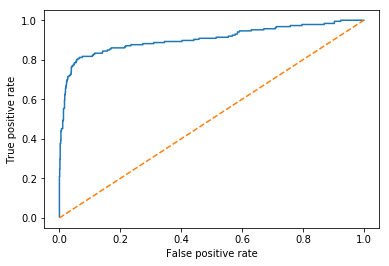

In [26]:
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot([0,1],[0,1],"--")
plt.show()

In [43]:
## The default probabilty threshold is 50% 

In [44]:
# checking the area under the curve - for a default random model AUC - 0.5 
#So, we make sure we get better AUC score for a better performing model

In [27]:
auc = roc_auc_score(y_test,y_pred_prob)

In [28]:
print(auc)

0.9046863799283155


### FROM THE Above result we can see the area under the curve is 90% which indicates the model is pretty good for the predictions further

In [29]:
importances= model.feature_importances_
sort=np.argsort(importances)
label=X.columns[sort]


In [30]:
X.shape
ss= range(X.shape[1])
print(ss)

range(0, 19)


<Container object of 19 artists>

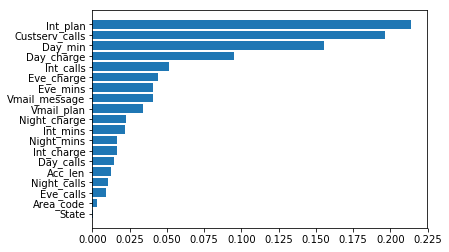

In [31]:
plt.barh(ss,importances[sort],tick_label=label)

### The above figure shows the feature importances for the particular model.and which features drive churn the most

In [32]:
from sklearn.externals import joblib

In [33]:
joblib.dump(model,'Telecom_trained_model.ml')

['Telecom_trained_model.ml']

In [34]:
#to load the trained model
model=joblib.load('Telecom_trained_model.ml')